Dask is a open-source library that provides advanced parallelization for analytics, especially when we need to work with large data. We are more familier with Spark and Hadoop but they are in Apache ecosystem, thus it not works with python package like numpy, sklearn, seaborn,... Dask is better version of combination of pandas and spark when we can handle large data in parallelization with Python evironments, it also smaller and lighter weight than spark. 

# 1. Dask array

[Dask Array](https://tutorial.dask.org/02_array.html) uses blocked algorithms to cut the large numpy array into many small pieces, then operate these pieces into grid to optimize memory on the computer. Small pieces which dask separates are called chunk. Controlling the chunk arrangement and choosing chunk size is important to optimize the performance of advanced algorithms. Read more about how to choose chunk size [here](https://docs.dask.org/en/stable/array-chunks.html) or we can set `chunk_size = 'auto'` to automatically choose chunk size

Almost functions and attributes in numpy have been shown in dask, the different is that the data type in dask is *dask.array* but after computing, the result will be in *numpy.ndarray* type. Some functions in numpy are not supported in dask such as np.linalg, sort, tolist and topk

In [1]:
import numpy as np
import dask.array as da

A = da.random.random((2, 3), chunks=(2, 1))
B = da.random.random((2, 3), chunks=(2, 1))

C = A + B
print(type(A))
print(type(B))
print(type(C))

<class 'dask.array.core.Array'>
<class 'dask.array.core.Array'>
<class 'dask.array.core.Array'>


In [2]:
C

dask.array<add, shape=(2, 3), dtype=float64, chunksize=(2, 1), chunktype=numpy.ndarray>

In [3]:
C.compute()

array([[0.56168493, 0.5442219 , 1.14983332],
       [1.41595155, 1.07498718, 0.99888115]])

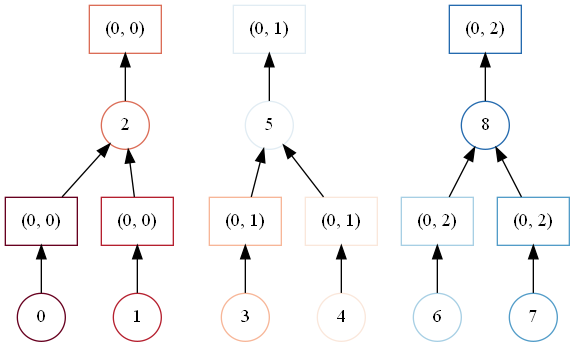

In [7]:
C.visualize(color='order')

In [40]:
matrix = da.random.random((10,10,10),chunks=(5,5,5))
matrix

dask.array<random_sample, shape=(10, 10, 10), dtype=float64, chunksize=(5, 5, 5), chunktype=numpy.ndarray>

In [41]:
matrix.chunksize

(5, 5, 5)

In [43]:
matrix.chunks

((5, 5), (5, 5), (5, 5))

In [49]:
matrix.rechunk({0: 5, 1: 10, 2: 'auto'})

dask.array<rechunk-merge, shape=(10, 10, 10, 10), dtype=float64, chunksize=(5, 10, 10, 5), chunktype=numpy.ndarray>

# 2. Dask dataframe 

[Dask dataframe](https://tutorial.dask.org/01_dataframe.html) has the same operation with dask array which split pandas dataframe into small pieces, a dask dataframe is partitioned row-wise, grouping rows by index value for efficiency. Dask dataframe is commonly used when data size is too large to fit the memory. All dask collections uses lazy evaluation like pyspark, which means Dask constructs the logic (called task graph) of the computation immediately but “evaluates” them when using `.compute()`. This task graph can be viewed using `.visualize()`

There are 2 disadvantages of dask dataframe:
1. When it load/read a file, it only load a sample of data so the datatype of each column can be wrong. The solution is increase the size of data sample (in bytes) or config the dtype when read the data.
2. It not cover all propertities in pandas because pandas API is huge, and some functions can not work in parrallel like sorting.

In [10]:
import dask.dataframe as dd

In [11]:
df = dd.read_csv('data/youtube_trending.csv')
df.head()

,video_id,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,2kyS6SvSYSE,2017-11-14,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False
1,1ZAPwfrtAFY,2017-11-14,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,False
2,5qpjK5DgCt4,2017-11-14,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,False
3,puqaWrEC7tY,2017-11-14,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,False
4,d380meD0W0M,2017-11-14,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,False


In [65]:
df = dd.read_csv(urlpath='data/youtube_trending.csv',
                 sample=500000,
                 dtype={'video_id':str,
                       'category_id':int})
df.tail()

,video_id,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
9876,OVnxBcS5qWo,2018-02-01,Nintendo,20,2018-01-25T21:25:58.000Z,434156,14685,411,2277,False,False
9877,ltzy5vRmN8Q,2018-02-01,BURGER KING,24,2018-01-24T14:08:29.000Z,4003530,119341,9363,20414,False,False
9878,NEmFS50lsTw,2018-02-01,SKITTLESbrand,24,2018-01-24T15:31:57.000Z,483127,3924,362,506,False,False
9879,NZ0ImXT1FZk,2018-02-01,Brave Wilderness,15,2018-01-24T12:00:02.000Z,1417253,44358,893,6858,False,False
9880,t3z_pdr6z8w,2018-02-01,Jackie Aina,26,2018-01-25T05:05:42.000Z,877585,115391,1621,15749,False,False


In [68]:
print(len(df))
print(type(df))

9881
<class 'dask.dataframe.core.DataFrame'>


In [12]:
dfCategory = df.groupby('category_id').count()[['video_id']]
dfCategory.compute().head()

,video_id
category_id,
1,532
2,109
10,1614
15,195
17,466


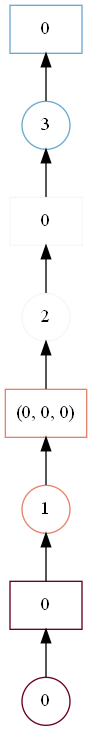

In [15]:
dfCategory.visualize(color='order')

In [16]:
df['category_id'].value_counts().compute()

24    2409
10    1614
23     927
26     913
22     798
25     784
28     546
1      540
17     482
27     352
15     199
2      109
19      98
20      85
29      15
43      10
Name: category_id, dtype: int64

In [84]:
df.isna().mean().compute()

video_id             0.009108
trending_date        0.000000
channel_title        0.000000
category_id          0.000000
publish_time         0.000000
views                0.000000
likes                0.000000
dislikes             0.000000
comment_count        0.000000
comments_disabled    0.000000
ratings_disabled     0.000000
dtype: float64

# 3. Dask Delayed 

In case in dask numpy and pandas don't have the function you want to solve the problem, Dask provide a solution which can make a user define function into parallel, it calls Dask Delayed interface. Dask delayed is also a data type in Dask, when you make a object with dask delayed, the output will be called *delayed object*. Dask delayed is a low-level interface which can be used for general-purpose scalability.

In [17]:
import dask

In [30]:
def double(x):
    return x ** 2

data = [1, 2, 3, 4, 5]

output = []
for x in data:
    a = double(x)
    output.append(a)

total = sum(output)
total

55

In [42]:
output = []
for x in data:
    a = dask.delayed(double)(x)
    output.append(a)

total = dask.delayed(sum)

In [34]:
print(type(total))
print(type(a))

<class 'dask.delayed.DelayedLeaf'>
<class 'dask.delayed.Delayed'>


In [37]:
total(output).compute()

55

### Decorator 

In [57]:
@dask.delayed
def double(x):
    return x ** 2
    
output = []
for x in data:
    a = double(x)
    output.append(a)

dask.delayed(sum)(output).compute()

55

C:\Users\ADMIN\anaconda3\lib\statistics.py:168: RuntimeWarning: overflow encountered in long_scalars
  partials[d] = partials_get(d, 0) + n


# 4. Dask Distributed 

Dask is capable of running across machines/workers, it also provides a scheduler to monitor the workflow and task resource. Before begining the task, setup the Client to allocate the memory, drivers and create dashboard to track the process of the task

In [62]:
from dask.distributed import LocalCluster, Client

In [63]:
# cluster manager like hadoop
cluster = LocalCluster()
cluster

C:\Users\ADMIN\anaconda3\lib\site-packages\distributed\node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 63295 instead
  warnings.warn(


In [58]:
cluster.get_logs()

{'Cluster': '',
 'Scheduler': "distributed.scheduler - INFO - Clear task state\ndistributed.scheduler - INFO -   Scheduler at:     tcp://127.0.0.1:63100\ndistributed.scheduler - INFO -   dashboard at:            127.0.0.1:8787\ndistributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:63123', name: 1, memory: 0, processing: 0>\ndistributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:63123\ndistributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:63126', name: 2, memory: 0, processing: 0>\ndistributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:63126\ndistributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:63129', name: 0, memory: 0, processing: 0>\ndistributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:63129\ndistributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:63132', name: 3, memory: 0, processing: 0>\ndistributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:63132",
 'tcp://127.0.0.1:63123': 'distributed.worker - INFO -       Start worker at:      tcp://127.0.0.1:63123\ndistributed.worker - INFO -          Listening to:      tcp://127.0.0.1:63123\ndistributed.worker - INFO -          dashboard at:            127.0.0.1:63124\ndistributed.worker - INFO - Waiting to connect to:      tcp://127.0.0.1:63100\ndistributed.worker - INFO - -------------------------------------------------\ndistributed.worker - INFO -               Threads:                          3\ndistributed.worker - INFO -                Memory:                   1.84 GiB\ndistributed.worker - INFO -       Local Directory: D:\\DATA ANALYTICS\\data-science\\dask-worker-space\\worker-a8xy_deu\ndistributed.worker - INFO - -------------------------------------------------\ndistributed.worker - INFO -         Registered to:      tcp://127.0.0.1:63100\ndistributed.worker - INFO - -------------------------------------------------',
 'tcp://127.0.0.1:63126': 'distributed.worker - INFO -       Start worker at:      tcp://127.0.0.1:63126\ndistributed.worker - INFO -          Listening to:      tcp://127.0.0.1:63126\ndistributed.worker - INFO -          dashboard at:            127.0.0.1:63127\ndistributed.worker - INFO - Waiting to connect to:      tcp://127.0.0.1:63100\ndistributed.worker - INFO - -------------------------------------------------\ndistributed.worker - INFO -               Threads:                          3\ndistributed.worker - INFO -                Memory:                   1.84 GiB\ndistributed.worker - INFO -       Local Directory: D:\\DATA ANALYTICS\\data-science\\dask-worker-space\\worker-pxuz1vil\ndistributed.worker - INFO - -------------------------------------------------\ndistributed.worker - INFO -         Registered to:      tcp://127.0.0.1:63100\ndistributed.worker - INFO - -------------------------------------------------',
 'tcp://127.0.0.1:63129': 'distributed.worker - INFO -       Start worker at:      tcp://127.0.0.1:63129\ndistributed.worker - INFO -          Listening to:      tcp://127.0.0.1:63129\ndistributed.worker - INFO -          dashboard at:            127.0.0.1:63130\ndistributed.worker - INFO - Waiting to connect to:      tcp://127.0.0.1:63100\ndistributed.worker - INFO - -------------------------------------------------\ndistributed.worker - INFO -               Threads:                          3\ndistributed.worker - INFO -                Memory:                   1.84 GiB\ndistributed.worker - INFO -       Local Directory: D:\\DATA ANALYTICS\\data-science\\dask-worker-space\\worker-morbxpvh\ndistributed.worker - INFO - -------------------------------------------------\ndistributed.worker - INFO -         Registered to:      tcp://127.0.0.1:63100\ndistributed.worker - INFO - -------------------------------------------------',
 'tcp://127.0.0.1:63132': 'distributed.worker - INFO -       Start worker at:      tcp://127.0.0.1:63132\ndistributed.worker -

In [64]:
# start dask client with cluster config
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:63295/status,
Status: running,Using processes: True
Dashboard: http://127.0.0.1:63295/status,Workers: 4
Total threads: 12,Total memory: 7.35 GiB
Comm: tcp://127.0.0.1:63296,Workers: 4
Dashboard: http://127.0.0.1:63295/status,Total threads: 12
Started: Just now,Total memory: 7.35 GiB
Comm: tcp://127.0.0.1:63319,Total threads: 3
Dashboard: http://127.0.0.1:63320/status,Memory: 1.84 GiB
Nanny: tcp://127.0.0.1:63300,


In [66]:
#direclty pass LocalCluster arguments
client = Client(name='Linhpt', n_workers=2, threads_per_worker=4)

C:\Users\ADMIN\anaconda3\lib\site-packages\distributed\node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 63346 instead
  warnings.warn(


In [28]:
client.close()

# 5. Dask - ML

[Dask-ML](https://ml.dask.org/) provides scalable machine learning in Python with popular library likes sklearn, xgboost,... To parallize the training process in machine learning, Dask uses [Blockwise Ensemble Method](https://examples.dask.org/machine-learning/blockwise-ensemble.html) which splits training data into partitions and fits a copy of sklearn estimator on each partition. The importance thing when using Dask-ML is the distribution of data in each partition must be uniform (or no bias). At predictiontion time, Dask combine the result from all partition by averaging or voting.

For the best performance, Dask separate into situtations based on size of training and testing dataset, but for convience you can use the second way for all situtation:

1. With large models (many hyperparameters) fit on a medium-sized dataset, Dask comes with Joblib by providing [parallel_backend](https://examples.dask.org/machine-learning/scale-scikit-learn.html) at fit step, that means you can use sklearn collection to preprocess, create estimators,... and fit them using dask backend.
2. With large dataset, using functions in [dask-ml](https://ml.dask.org/modules/api.html#) instead of sklearn, Dask-ML is a copy of all useful functions in sklearn which cover many types of function such as preprocessing, regression, classification, model selection, gridsearch,...
3. With small training dataset but large predicting dataset, Dask provide [ParallelPostFit](https://ml.dask.org/modules/generated/dask_ml.wrappers.ParallelPostFit.html) to parallel the prediction step

In [8]:
from dask.distributed import Client, progress
client = Client(n_workers=4, threads_per_worker=1, memory_limit='2GB')
client

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Status: running,Using processes: True
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:50123,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:50153,Total threads: 1
Dashboard: http://127.0.0.1:50155/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:50128,


### Using Joblib parallel backend 

In [5]:
import datetime as dt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, fbeta_score

In [6]:
dfCancer = pd.read_csv('data/breast_cancer.csv')
x = dfCancer.drop(columns='target')
y = dfCancer.target
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=1)

In [7]:
params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'sigmoid'],
    'gamma': [0.01, 0.1, 1],
    'probability': [True],
}

algo = SVC()
validator = GridSearchCV(algo, params, cv=5, scoring='roc_auc')

In [17]:
# using dask backend at fit step
import joblib

with joblib.parallel_backend('dask'):
    validator.fit(xTrain, yTrain)

validator.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}

C:\Users\ADMIN\anaconda3\lib\statistics.py:168: RuntimeWarning: overflow encountered in long_scalars
  partials[d] = partials_get(d, 0) + n


### Using Dask-ML functions 

*Note*: There are 2 ways to use dask with Xgboost, uses Dask module in Xgboost package or use xgboost module in dask-ml package. But Xgboost module is no longer maintained, using dask directly in XGBoost for best performance

In [15]:
import datetime as dt
import numpy as np
import pandas as pd

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

import dask.array as da
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split, GridSearchCV
from dask_ml.metrics import log_loss, accuracy_score

In [4]:
dfCancer = dd.read_csv('data/breast_cancer.csv')
x = dfCancer.drop(columns='target')
y = dfCancer.target

In [5]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=1/5, random_state=1, shuffle=True)
xTrain, xValid, yTrain, yValid = train_test_split(xTrain, yTrain, test_size=1/4, random_state=1,shuffle=True)

In [22]:
algo = xgb.dask.DaskXGBClassifier(
    # hyperparameters
    num_leaves=2**5,
    learning_rate=0.05,
    n_estimators=200,
    
    # configurations
    verbosity=0, silent=1,
    importance_type='gain',
    eval_metric=['logloss', 'auc'],
)

In [23]:
model = algo.fit(xTrain, yTrain)

In [26]:
yTestPred = model.predict_proba(xTest)
yTestPred

dask.array<from-value, shape=(128,), dtype=float32, chunksize=(128,), chunktype=numpy.ndarray>

In [27]:
log_loss(yTest, yTestPred).compute()

0.17385315634646759

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*